In [1]:
from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas as pd

print(nltk.__version__)
print(tensorflow.__version__)
print(pd.__version__)
print(version('summa'))

3.6.5
2.6.0
1.3.3
1.2.0


In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [3]:
data.sample(10)

,headlines,text
43852,"BSNL, Air India, MTNL worst performing state-o...","BSNL, Air India and MTNL were the least profit..."
56496,RBI puts restrictions on Corporation Bank as b...,India's state-run Corporation Bank has said th...
89884,"Delhi Metro hikes fares after 8 yrs, maximum f...",The Delhi Metro Rail Corporation board has acc...
24104,"Muslims have 9-10 kids, will demand new Pakist...",Uttar Pradesh BJP MP Hari Om Pandey has claime...
41370,Sahara Desert expanded by 10% in last century:...,The Sahara Desert has expanded by 10% in the p...
63285,India jumps 30 places on ease of doing busines...,India has jumped 30 places to be ranked 100 am...
23052,18 killed in helicopter crash in Russia,Eighteen people were killed in a helicopter cr...
57799,Need more evidence from India to prosecute Sae...,Pakistan's envoy to the US Aizaz Ahmad Chaudhr...
31266,Mandeep jumps to save ball from going for four...,RCB's Mandeep Singh pulled off an acrobatic bo...
6983,"Who is Vanessa Ponce de Leon, crowned Miss Wor...","Mexico's 26-year-old Vanessa Ponce de Leon, wh..."


In [4]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


=3


In [5]:
data.shape

(98401, 2)

In [7]:
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [9]:
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


In [10]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [11]:
data.dropna(axis=0, inplace=True)

In [12]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [13]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [14]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

=3


In [15]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [17]:
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
clean_text = []

# [[YOUR CODE]]
for i, sentence in enumerate(data['text']):
    clean_text.append(preprocess_sentence(sentence))
    if i % 1000 == 0:
        print(i/data.shape[0])

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

0.0
0.010166734444896299
0.020333468889792598
0.030500203334688898
0.040666937779585195
0.0508336722244815
0.061000406669377796
0.0711671411142741
0.08133387555917039
0.09150061000406669
0.101667344448963
0.1118340788938593
0.12200081333875559
0.1321675477836519
0.1423342822285482
0.15250101667344448
0.16266775111834078
0.17283448556323708
0.18300122000813338
0.1931679544530297
0.203334688897926
0.2135014233428223
0.2236681577877186
0.2338348922326149
0.24400162667751119
0.2541683611224075
0.2643350955673038
0.2745018300122001
0.2846685644570964
0.29483529890199267
0.30500203334688897
0.31516876779178526
0.32533550223668156
0.33550223668157786
0.34566897112647416
0.35583570557137045
0.36600244001626675
0.37616917446116305
0.3863359089060594
0.3965026433509557
0.406669377795852
0.4168361122407483
0.4270028466856446
0.4371695811305409
0.4473363155754372
0.4575030500203335
0.4676697844652298
0.4778365189101261
0.48800325335502237
0.49816998779991867
0.508336722244815
0.5185034566897113
0.

In [20]:
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
clean_headlines = []

# [[YOUR CODE]]
for i, sentence in enumerate(data['headlines']):
    clean_headlines.append(preprocess_sentence(sentence, False))
    if i % 1000 == 0:
        print(i/data.shape[0])

print("headlines 전처리 후 결과: ", clean_headlines[:5])

0.0
0.010166734444896299
0.020333468889792598
0.030500203334688898
0.040666937779585195
0.0508336722244815
0.061000406669377796
0.0711671411142741
0.08133387555917039
0.09150061000406669
0.101667344448963
0.1118340788938593
0.12200081333875559
0.1321675477836519
0.1423342822285482
0.15250101667344448
0.16266775111834078
0.17283448556323708
0.18300122000813338
0.1931679544530297
0.203334688897926
0.2135014233428223
0.2236681577877186
0.2338348922326149
0.24400162667751119
0.2541683611224075
0.2643350955673038
0.2745018300122001
0.2846685644570964
0.29483529890199267
0.30500203334688897
0.31516876779178526
0.32533550223668156
0.33550223668157786
0.34566897112647416
0.35583570557137045
0.36600244001626675
0.37616917446116305
0.3863359089060594
0.3965026433509557
0.406669377795852
0.4168361122407483
0.4270028466856446
0.4371695811305409
0.4473363155754372
0.4575030500203335
0.4676697844652298
0.4778365189101261
0.48800325335502237
0.49816998779991867
0.508336722244815
0.5185034566897113
0.

In [21]:
data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')

=3


In [22]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [23]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


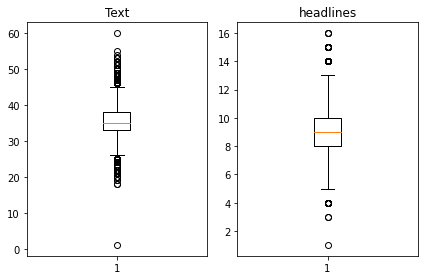

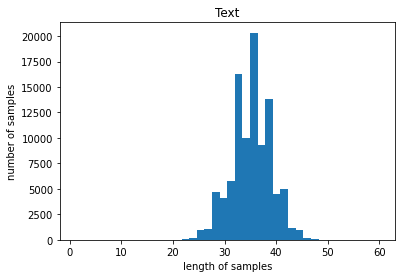

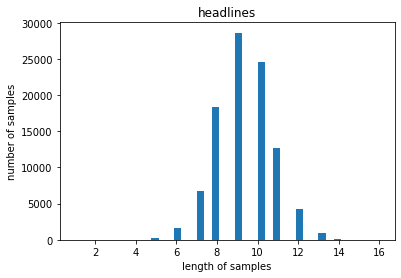

In [24]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [36]:
text_max_len = 41
headlines_max_len = 11
print('=3')

=3


In [37]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [38]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 41 이하인 샘플의 비율: 0.9549613664091094
전체 샘플 중 길이가 11 이하인 샘플의 비율: 0.9449877999186661


In [39]:
# [[YOUR CODE]]
cond0 = data['text'].apply(lambda sentence : len(sentence.split())) < text_max_len
cond1 = data['headlines'].apply(lambda sentence : len(sentence.split())) < headlines_max_len

data = data[cond0 & cond1]

print('전체 샘플수 :', (len(data)))

전체 샘플수 : 74102


In [40]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
9,cong wins ramgarh bypoll in rajasthan takes to...,congress candidate shafia zubair ramgarh assem...,sostoken cong wins ramgarh bypoll in rajasthan...,cong wins ramgarh bypoll in rajasthan takes to...
10,up cousins fed human excreta for friendship wi...,two minor cousins uttar pradesh gorakhpur alle...,sostoken up cousins fed human excreta for frie...,up cousins fed human excreta for friendship wi...


In [41]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [42]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[64339 55428 27768 ... 40428  3812 21539]


In [43]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


In [44]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 14820


In [45]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 59282
훈련 레이블의 개수 : 59282
테스트 데이터의 개수 : 14820
테스트 레이블의 개수 : 14820


In [46]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [51]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 61397
등장 빈도가 6번 이하인 희귀 단어의 수: 42071
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 19326
단어 집합에서 희귀 단어의 비율: 68.52289199798037
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.18087530063762


In [52]:
threshold = 8
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 61397
등장 빈도가 7번 이하인 희귀 단어의 수: 43386
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 18011
단어 집합에서 희귀 단어의 비율: 70.66469045718846
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.629941311633761


In [53]:
threshold = 9
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 61397
등장 빈도가 8번 이하인 희귀 단어의 수: 44518
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 16879
단어 집합에서 희귀 단어의 비율: 72.50842875059041
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.071738356237895


In [54]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 61397
등장 빈도가 6번 이하인 희귀 단어의 수: 42071
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 19326
단어 집합에서 희귀 단어의 비율: 68.52289199798037
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.18087530063762


In [55]:
src_vocab = 20000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성
print('=3')

=3


In [56]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[1004, 9240, 2794, 35, 7798, 6415, 73, 13, 255, 520, 1553, 915, 13, 294, 1135, 5896, 1703, 1501, 81, 1004, 10626, 2, 15, 36, 6126, 335, 96, 117, 9240, 2685, 2, 15, 61], [531, 150, 606, 1679, 470, 26, 296, 41, 247, 17, 33, 41, 17, 2777, 150, 19, 3072, 531, 319, 175, 402, 485, 41, 247, 489, 365, 5030, 1006, 2318, 796, 6127, 338, 4083, 19327, 490, 1], [45, 101, 2836, 2580, 580, 395, 1439, 103, 338, 2052, 1951, 561, 3648, 119, 17, 3912, 85, 7232, 1439, 1502, 2580, 1, 98, 339, 1451, 138, 250, 6218]]


In [57]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('=3')

=3


In [61]:
threshold = 4
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 27227
등장 빈도가 3번 이하인 희귀 단어의 수: 15691
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 11536
단어 집합에서 희귀 단어의 비율: 57.630293458699086
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.074668497618332


In [62]:
threshold = 5
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 27227
등장 빈도가 4번 이하인 희귀 단어의 수: 17076
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10151
단어 집합에서 희귀 단어의 비율: 62.71715576449848
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.025619019010428


In [63]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 27227
등장 빈도가 5번 이하인 희귀 단어의 수: 18152
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9075
단어 집합에서 희귀 단어의 비율: 66.66911521651302
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.94910526541647


In [64]:
threshold = 5
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 27227
등장 빈도가 4번 이하인 희귀 단어의 수: 17076
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10151
단어 집합에서 희귀 단어의 비율: 62.71715576449848
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.025619019010428


In [65]:
tar_vocab = 10000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 1074, 9077, 592, 4, 2144, 3, 1037, 1479], [1, 202, 15, 797, 11, 17, 91, 421, 115, 2542], [1, 1085, 663, 3, 387, 30, 1038, 11, 506, 8219], [1, 8, 3834, 25, 6066, 535, 13, 3972], [1, 2662, 1480, 1498, 67, 21, 4, 38, 7541, 63]]
target
decoder  [[1074, 9077, 592, 4, 2144, 3, 1037, 1479, 2], [202, 15, 797, 11, 17, 91, 421, 115, 2542, 2], [1085, 663, 3, 387, 30, 1038, 11, 506, 8219, 2], [8, 3834, 25, 6066, 535, 13, 3972, 2], [2662, 1480, 1498, 67, 21, 4, 38, 7541, 63, 2]]


In [66]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 59282
훈련 레이블의 개수 : 59282
테스트 데이터의 개수 : 14820
테스트 레이블의 개수 : 14820


In [67]:
# 패딩하기
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')
print('=3')

=3


In [68]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# [[YOUR CODE]]
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# [[YOUR CODE]]
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

In [69]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h3, state_c3])

In [70]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

print(tar_vocab, type(tar_vocab))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 41)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 41, 128)      2560000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 41, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [71]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_output3])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 41)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 41, 128)      2560000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 41, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [72]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
232/232 [==============================] - 54s 78ms/step - loss: 6.6980 - val_loss: 6.4707
Epoch 2/50
232/232 [==============================] - 17s 74ms/step - loss: 6.2392 - val_loss: 6.3159
Epoch 3/50
232/232 [==============================] - 17s 75ms/step - loss: 5.9072 - val_loss: 5.7408
Epoch 4/50
232/232 [==============================] - 18s 76ms/step - loss: 5.5976 - val_loss: 5.5078
Epoch 5/50
232/232 [==============================] - 18s 78ms/step - loss: 5.3554 - val_loss: 5.3487
Epoch 6/50
232/232 [==============================] - 18s 79ms/step - loss: 5.1476 - val_loss: 5.2160
Epoch 7/50
232/232 [==============================] - 19s 81ms/step - loss: 4.9575 - val_loss: 5.0912
Epoch 8/50
232/232 [==============================] - 19s 81ms/step - loss: 4.7812 - val_loss: 5.0066
Epoch 9/50
232/232 [==============================] - 19s 80ms/step - loss: 4.6286 - val_loss: 4.9200
Epoch 10/50
232/232 [==============================] - 19s 80ms/step - loss: 4.483

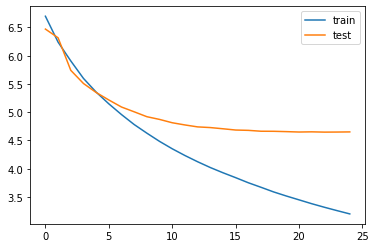

In [73]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [74]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

=3


In [75]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_output3, state_h3, state_c3])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


In [76]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

=3


In [77]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

=3


In [78]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    # [[YOUR CODE]]
    temp=''
    for i in input_seq:
        if (i not in[0, tar_word_to_index['sostoken'], tar_word_to_index['eostoken']]):
            temp = temp + tar_index_to_word[i]+' '
    return temp

print('=3')

=3


In [79]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : apple maps unveiled indoor airports across globe let users look inside check desks airport lounges bathrooms locations company primarily covered american airports airports hong kong amsterdam geneva london also included users also able use virtual assistant siri service 
실제 요약 : apple maps gets indoor for over airports 
예측 요약 :  passengers of parking in mumbai mall flight


원문 : police state mining department tuesday found illegal sand mining taking place greater noida two plots near yamuna river authorities said recovered around cubic metres sand plots plot owners booked issued notices worth lakh 
실제 요약 : illegal sand mining along yamuna in noida 
예측 요약 :  illegal mining found dead in tn


원문 : karnataka high court thursday directed state government submit report within month policy framed protect rti activists petitioner claimed representation submitted february frame policy ignored state government court fixed next hearing august 
실제 요약 : karnataka high court seeks report on wh

예측 요약 :  sridevi sridevi is not sridevi sridevi sridevi


원문 : pictures saif ali khan kareena kapoor khan first child taimur ali khan surfaced online one photographs shows taimur mother kareena actor tusshar kapoor son laksshya recently held first birthday celebrations notably taimur born december 
실제 요약 : pictures of saif kareena son taimur surface online 
예측 요약 :  kareena kareena taimur pic with kareena


원문 : usa christian coleman broke year old world record metres sprint registering timing seconds us indoor national championships sunday former american sprinter held record seconds coleman metres silver medal last year world championships london 
실제 요약 : runs in sec breaks yr old world record 
예측 요약 :  world most expensive telescope breaks record


원문 : priyanka chopra home mumbai decorated lights ahead wedding nick jonas couple marry per hindu rituals december christian wedding take place december umaid bhawan palace jodhpur suggested reports pre wedding festivities including sange

예측 요약 :  india to invest crore in air india


원문 : founders startups including paytm ola written letter home minister rajnath singh stayzilla row co founder yogendra vasupal arrested unpaid dues founders opposed arrest called free fair investigation matter notably another stayzilla co founder received threats son life 
실제 요약 : write open letter to home minister on stayzilla 
예측 요약 :  stayzilla founder resigns from selling startup




In [80]:
# 추출적 요약

In [135]:
import requests
from summa.summarizer import summarize

In [136]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [137]:
type(text), len(text)

(str, 35932)

In [138]:
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [139]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


In [140]:
print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [141]:
data.head()

,headlines,text,decoder_input,decoder_target
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
9,cong wins ramgarh bypoll in rajasthan takes to...,congress candidate shafia zubair ramgarh assem...,sostoken cong wins ramgarh bypoll in rajasthan...,cong wins ramgarh bypoll in rajasthan takes to...
10,up cousins fed human excreta for friendship wi...,two minor cousins uttar pradesh gorakhpur alle...,sostoken up cousins fed human excreta for frie...,up cousins fed human excreta for friendship wi...


In [146]:
temp_data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [147]:
temp_data = temp_data.assign(text_length=temp_data['text'].apply(len)).sort_values(by='text_length', ascending=False).drop(columns=['text_length'])
temp_data

,headlines,text
87519,Which is PM Modi's most retweeted tweet in 3yr...,As the PM Narendra Modi-led NDA government com...
428,"Ã¢ÂÂThe Intelligent SUV"" - Nissan Kicks laun...","The Nissan Kicks, which was recently launched ..."
93778,Airtel drops 'officially' from 'fastest networ...,Telecom major Bharti Airtel has modified its Ã...
379,Raj Thackeray's son Amit marries fashion desig...,Maharashtra Navnirman Sena (MNS) president Raj...
12302,Aamir advocates #ExperienceChange with the new...,Drive in the next generation and #ExperienceCh...
...,...,...
69624,Watch FREE movies on Vodafone Play with Vodafo...,nVodafone RED Postpaid customers can now strea...
53809,Video reveals startling facts about your money,In this video of a new and unique science expe...
4281,No more skipping breakfast with '3 Minute Brea...,Backed by the observation that breakfast is th...
22479,Vodafone RED Postpaid offers Amazon Prime at n...,Make the #SmartestMove & get 1-year of Amazon ...


In [151]:
text2 = temp_data.iloc[1, 1]
type(text2), len(text2)

(str, 459)

In [152]:
text2

'The Nissan Kicks, which was recently launched in India, is equipped with segment first-in-class around view monitor, 8.0Ã¢Â\x80Â\x9d floating infotainment system, leather-wrapped soft-touch dashboard and door trims. Customers can personalise their Kicks with 27 different accessory categories. Get hassle free ownership with Ã¢Â\x80Â\x9c3-year cost of maintenance packageÃ¢Â\x80Â\x9d, wherein customers get 3-year warranty, 3-year periodic service and 24x7 roadside assistance.'

In [155]:
print('Summary:')
print(summarize(text2, ratio=50))

Summary:
The Nissan Kicks, which was recently launched in India, is equipped with segment first-in-class around view monitor, 8.0Ã¢ÂÂ floating infotainment system, leather-wrapped soft-touch dashboard and door trims.
Customers can personalise their Kicks with 27 different accessory categories.
Get hassle free ownership with Ã¢ÂÂ3-year cost of maintenance packageÃ¢ÂÂ, wherein customers get 3-year warranty, 3-year periodic service and 24x7 roadside assistance.


In [157]:
print('Summary:')
print(summarize(text2, ratio=50, split=True))

Summary:
['The Nissan Kicks, which was recently launched in India, is equipped with segment first-in-class around view monitor, 8.0Ã¢Â\x80Â\x9d floating infotainment system, leather-wrapped soft-touch dashboard and door trims.', 'Customers can personalise their Kicks with 27 different accessory categories.', 'Get hassle free ownership with Ã¢Â\x80Â\x9c3-year cost of maintenance packageÃ¢Â\x80Â\x9d, wherein customers get 3-year warranty, 3-year periodic service and 24x7 roadside assistance.']


In [159]:
print('Summary:')
print(summarize(text2, words=10))

Summary:
Customers can personalise their Kicks with 27 different accessory categories.


In [165]:
temp_data.iloc[:1, :1]

,headlines
87519,Which is PM Modi's most retweeted tweet in 3yr...


In [169]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("추출 요약 :", summarize(seq2text(encoder_input_test[i]), words=20))
    print("\n")

원문 : apple maps unveiled indoor airports across globe let users look inside check desks airport lounges bathrooms locations company primarily covered american airports airports hong kong amsterdam geneva london also included users also able use virtual assistant siri service 
실제 요약 : apple maps gets indoor for over airports 
예측 요약 :  passengers of parking in mumbai mall flight
추출 요약 : 


원문 : police state mining department tuesday found illegal sand mining taking place greater noida two plots near yamuna river authorities said recovered around cubic metres sand plots plot owners booked issued notices worth lakh 
실제 요약 : illegal sand mining along yamuna in noida 
예측 요약 :  illegal mining found dead in tn
추출 요약 : 


원문 : karnataka high court thursday directed state government submit report within month policy framed protect rti activists petitioner claimed representation submitted february frame policy ignored state government court fixed next hearing august 
실제 요약 : karnataka high court 

예측 요약 :  sexual harassment filed against sexual harassment
추출 요약 : 


원문 : paying tribute late actress sridevi bollywood actor akshay kumar tweeted shocked beyond words hear sad demise sridevi added dream many good fortune sharing screen space long ago witnessed continued grace years thoughts prayers family rip 
실제 요약 : shocked beyond words akshay kumar on sridevi demise 
예측 요약 :  sridevi sridevi is not sridevi sridevi sridevi
추출 요약 : 


원문 : pictures saif ali khan kareena kapoor khan first child taimur ali khan surfaced online one photographs shows taimur mother kareena actor tusshar kapoor son laksshya recently held first birthday celebrations notably taimur born december 
실제 요약 : pictures of saif kareena son taimur surface online 
예측 요약 :  kareena kareena taimur pic with kareena
추출 요약 : 


원문 : usa christian coleman broke year old world record metres sprint registering timing seconds us indoor national championships sunday former american sprinter held record seconds coleman metres 

예측 요약 :  uk pm dismisses case against corruption
추출 요약 : 


원문 : expressing prime minister narendra modi led central government rule maharashtra navnirman sena chief raj thackeray said pm three half years tenure utter failure believed modi first say prime minister india thought would steer india progress showed results thackeray added 
실제 요약 : modi tenure an failure mns chief raj thackeray 
예측 요약 :  pm modi meets pm modi
추출 요약 : 


원문 : civil aviation ministry discussions finance ministry crore bailout package debt ridden air india according reports discussions come backdrop failed effort privatise loss making national carrier notably airline staying bailout package extended previous upa regime 
실제 요약 : air india may get crore bailout package report 
예측 요약 :  india to invest crore in air india
추출 요약 : 


원문 : founders startups including paytm ola written letter home minister rajnath singh stayzilla row co founder yogendra vasupal arrested unpaid dues founders opposed arrest called free

In [174]:
temp_index = data.index
temp_index

Int64Index([    2,     3,     5,     9,    10,    16,    18,    19,    20,
               21,
            ...
            98390, 98391, 98392, 98393, 98394, 98395, 98396, 98397, 98398,
            98400],
           dtype='int64', length=74102)

In [176]:
temp_data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')
temp_data = temp_data.iloc[temp_index, :]
temp_data

,headlines,text
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
5,Rahat Fateh Ali Khan denies getting notice for...,Pakistani singer Rahat Fateh Ali Khan has deni...
9,"Cong wins Ramgarh bypoll in Rajasthan, takes t...",Congress candidate Shafia Zubair won the Ramga...
10,UP cousins fed human excreta for friendship wi...,Two minor cousins in Uttar Pradesh's Gorakhpur...
...,...,...
98395,Pakistan starts building fence along Afghanist...,"Pakistan has started building a nearly 2,400-k..."
98396,CRPF jawan axed to death by Maoists in Chhatti...,A CRPF jawan was on Tuesday axed to death with...
98397,First song from Sonakshi Sinha's 'Noor' titled...,"'Uff Yeh', the first song from the Sonakshi Si..."
98398,'The Matrix' film to get a reboot: Reports,"According to reports, a new version of the 199..."


In [182]:
temp_data.iloc[indices].iloc[-n_of_val:].shape

(14820, 2)

In [184]:
temp_data = temp_data.iloc[indices].iloc[-n_of_val:]
temp_data

,headlines,text
75154,Trump accidentally retweets man calling him 'f...,After US President Donald Trump retweeted a ma...
48732,UP to give unmarried granddaughters right to a...,The Uttar Pradesh government is planning to in...
26073,"Nawaz Sharif, daughter Maryam to get AC, TV in...",Pakistan's former Prime Minister Nawaz Sharif ...
88164,Two soldiers martyred in encounter near LoC in...,At least two Army soldiers were martyred in an...
66177,Honeypreet confesses to planning Panchkula riots,Honeypreet Insan has confessed to Haryana Poli...
...,...,...
82168,I'll marry the woman I am in love with: Ranbir,"Actor Ranbir Kapoor, reacting to the rumours o..."
560,Name new Goa bridge after Manohar Parrikar: Go...,The Goa Tamil Sangam (GTS) has urged Union Min...
56688,TN police officer shot dead by robbery accused...,A Chennai police inspector was shot dead in Ra...
6224,"Leopard enters Gujarat courtroom; judge, lawye...",A leopard entered a courtroom in Gujarat's Sur...


In [190]:
for i in range(0, 50):
    print("원문 :", temp_data.iloc[i, 1])
    print("전처리 후 원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", temp_data.iloc[i, 0])
    print("전처리 후 실제 요약 :", seq2summary(decoder_input_test[i]))
    print("(Abstractive 추출)예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("Extractive 추출 요약 :", summarize(temp_data.iloc[i, 1], words=20))
    print("\n")

원문 : After US President Donald Trump retweeted a man calling him 'fascist', a user tweeted, "This is probably the closest Donald Trump is gonna get to being honest." Other Twitter users wrote, "I will bet every dollar in my bank account that @realdonaldtrump didn't know what "fascist" meant," and "Does... does Trump think "fascist" is a compliment?"
전처리 후 원문 : us president donald trump retweeted man calling fascist user tweeted probably closest donald trump gonna get honest twitter users wrote bet every dollar bank account know fascist meant trump think fascist compliment 
실제 요약 : Trump accidentally retweets man calling him 'fascist'
전처리 후 실제 요약 : trump accidentally retweets man calling him 
(Abstractive 추출)예측 요약 :  trump tweet on twitter users ivanka
Extractive 추출 요약 : 


원문 : The Uttar Pradesh government is planning to introduce a bill granting ancestral property rights to unmarried granddaughters who have lost their fathers. The bill will be tabled in the Budget session of the Uttar

(Abstractive 추출)예측 요약 :  us prez admits to restore bomb attacks
Extractive 추출 요약 : The revolt was triggered by fears that the Dalai Lama may be kidnapped, arrested or killed by the Chinese forces.


원문 : Actor Sushant Singh Rajput has said that he got dumped by his first girlfriend because he was too boring. "I've tried to be more interesting ever since." added Sushant. Further talking about the rumours of him dating his 'Raabta' co-star Kriti Sanon, Sushant said, "The stories often affect me but they never change my friendship with any co-star."
전처리 후 원문 : actor sushant singh rajput said got dumped first girlfriend boring tried interesting ever since added sushant talking rumours dating raabta co star kriti sanon sushant said stories often affect never change friendship co star 
실제 요약 : My first girlfriend dumped me as I was too boring: Sushant
전처리 후 실제 요약 : girlfriend dumped me as was too boring sushant 
(Abstractive 추출)예측 요약 :  late actor shares pic with son biopic
Extractive 추출 요약 

(Abstractive 추출)예측 요약 :  haasan denies rajinikanth on his daughter remark
Extractive 추출 요약 : Actor Kamal Haasan has said that he is not anti-Hindu and that he viewed Christianity and Islam in a "similar" manner.


원문 : Actor Akshay Kumar has said that if a guy touches a girl inappropriately, she should not panic and hit back. He added, "Unfortunately, because of some dirty people, girls have to learn self-defence." Akshay further said that ideally, girls should be free to be anywhere and at any time. 
전처리 후 원문 : actor akshay kumar said guy touches girl inappropriately panic hit back added unfortunately dirty people girls learn self defence akshay said girls free anywhere time 
실제 요약 : Girls should hit back if touched inappropriately: Akshay
전처리 후 실제 요약 : girls should hit back if touched akshay 
(Abstractive 추출)예측 요약 :  akshay kumar was the of akshay kumar
Extractive 추출 요약 : Actor Akshay Kumar has said that if a guy touches a girl inappropriately, she should not panic and hit back.


원문

(Abstractive 추출)예측 요약 :  us missile tests its new missile
Extractive 추출 요약 : United States Defence Secretary James Mattis on Friday said that the Syrian government has retained an unspecified amount of chemical weapons and dispersed its aircraft after the US cruise-missile attack on the Shayrat airbase this month.


원문 : In a first for Russia, two electric power stations have been sold to a private investor who plans to use them to power his cryptocurrency mining operations, according to reports. They were reportedly sold for about $3 million to businessman Aleksey Kolesnik. However, Kolesnik said mining will be possible only after Russia adopts relevant legislation, reports added.
전처리 후 원문 : first russia two electric power stations sold private investor plans use power cryptocurrency mining operations according reports reportedly sold million businessman however said mining possible russia relevant legislation reports added 
실제 요약 : Investor buys Russian power stations to mine cryptoc

(Abstractive 추출)예측 요약 :  anurag kashyap denies reports of sexual harassment
Extractive 추출 요약 : Filmmaker Anurag Kashyap's lawyer Venkatesh Dhond has said director Vikas Bahl broke down, confirmed that he sexually harassed an ex-employee and promised to go forÃ¢ÂÂ rehabilitation after being confronted by his business partners, including Kashyap.


원문 : A man in Uttar Pradesh's Lalitpur, has been arrested for allegedly killing his three daughters by smashing their heads with a hammer and setting them ablaze using LPG cylinder gas on Tuesday, police said. Adding that the accused was a habitual alcoholic, police said they suspect the man killed the girls, aged between four and ten years, out of frustration.
전처리 후 원문 : man uttar pradesh arrested allegedly killing three daughters smashing heads hammer setting ablaze using lpg cylinder gas tuesday police said adding accused alcoholic police said suspect man killed girls aged four ten years frustration 
실제 요약 : Man smashes 3 daughters' head 

(Abstractive 추출)예측 요약 :  marriage is not to be
Extractive 추출 요약 : Courts often hand over the custody of the child to the father simply because he earns more, an official said.


원문 : A railway track has been designed to run through a 19-storey residential building in the city of Chongqing, China. The Liziba Station, located between the building's sixth and eighth floor, was built to combat the lack of space in the city. The station has a noise insulation system, and the trains reportedly run on rubber tyres with air suspension units.
전처리 후 원문 : railway track designed run storey residential building city chongqing china station located building sixth eighth floor built combat lack space city station noise system trains reportedly run rubber tyres air suspension units 
실제 요약 : China has a train track passing through an apartment
전처리 후 실제 요약 : china has train track passing through an apartment 
(Abstractive 추출)예측 요약 :  mumbai station to hit international station reports
Extractive 추출 요약 :